In [2]:
import pandas as pd
import os
import statsmodels.api as sm
import numpy as np 
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [3]:
#! pip install statsmodels

In [4]:
df = pd.read_excel('IPFA_DonorData.xlsx', sheet_name='Data')

In [5]:
# Filtering the dataset to filter people who were in pilot test
df = df[df.pilottest == 1]

In [6]:
df.head()

,memberid,sex,age,incomebracket,yearsmember,levelofeducation,totalvisitsasmember,maritalstatus,visitedinlast6months,otherspend,pilottest,giveinpilot,pilottesttrainingset,pilottestvalidationset
1,111469745,0,55,1,13,5,4,1,0,70,1,0.0,0.0,1.0
2,111703284,1,45,1,27,1,9,1,0,0,1,0.0,1.0,0.0
3,111803259,1,66,1,8,4,1,1,0,22,1,0.0,0.0,1.0
17,114116342,1,67,1,7,2,9,1,0,73,1,0.0,1.0,0.0
20,114885727,1,57,1,35,5,18,1,0,20,1,0.0,0.0,1.0


In [7]:
cols_to_use = ['sex','age', 'incomebracket', 'yearsmember', 
               'levelofeducation', 'totalvisitsasmember','maritalstatus',
               'visitedinlast6months','otherspend','giveinpilot', 'pilottesttrainingset', 'pilottestvalidationset'
              ]


df = df[cols_to_use]
df.head()

,sex,age,incomebracket,yearsmember,levelofeducation,totalvisitsasmember,maritalstatus,visitedinlast6months,otherspend,giveinpilot,pilottesttrainingset,pilottestvalidationset
1,0,55,1,13,5,4,1,0,70,0.0,0.0,1.0
2,1,45,1,27,1,9,1,0,0,0.0,1.0,0.0
3,1,66,1,8,4,1,1,0,22,0.0,0.0,1.0
17,1,67,1,7,2,9,1,0,73,0.0,1.0,0.0
20,1,57,1,35,5,18,1,0,20,0.0,0.0,1.0


In [8]:
# incomebracket
# levelofeducation

In [9]:
#df.incomebracket.unique()

In [10]:
df_final = pd.get_dummies(df, columns=['incomebracket','levelofeducation'], drop_first=True)
df_final.head()

,sex,age,yearsmember,totalvisitsasmember,maritalstatus,visitedinlast6months,otherspend,giveinpilot,pilottesttrainingset,pilottestvalidationset,incomebracket_2,incomebracket_3,incomebracket_4,incomebracket_5,levelofeducation_2,levelofeducation_3,levelofeducation_4,levelofeducation_5
1,0,55,13,4,1,0,70,0.0,0.0,1.0,False,False,False,False,False,False,False,True
2,1,45,27,9,1,0,0,0.0,1.0,0.0,False,False,False,False,False,False,False,False
3,1,66,8,1,1,0,22,0.0,0.0,1.0,False,False,False,False,False,False,True,False
17,1,67,7,9,1,0,73,0.0,1.0,0.0,False,False,False,False,True,False,False,False
20,1,57,35,18,1,0,20,0.0,0.0,1.0,False,False,False,False,False,False,False,True


In [11]:
print(df_final.shape)

(13997, 18)


In [12]:
df_final.shape

(13997, 18)

In [14]:
df_final.giveinpilot.value_counts()

giveinpilot
0.0    13303
1.0      694
Name: count, dtype: int64

In [11]:
df_train = df_final[df_final.pilottesttrainingset == 1]
df_test  = df_final[df_final.pilottestvalidationset == 1]


df_train.drop(columns = ['pilottesttrainingset','pilottestvalidationset'],axis=1, inplace=True)
df_test.drop(columns = ['pilottesttrainingset','pilottestvalidationset'],axis=1, inplace=True)

print(df_train.shape[0], df_test.shape[0], df_train.shape[0] + df_test.shape[0])

8389 5608 13997


In [12]:
# Check for NULL Value
df_train.isnull().sum()

sex                     0
age                     0
yearsmember             0
totalvisitsasmember     0
maritalstatus           0
visitedinlast6months    0
otherspend              0
giveinpilot             0
incomebracket_2         0
incomebracket_3         0
incomebracket_4         0
incomebracket_5         0
levelofeducation_2      0
levelofeducation_3      0
levelofeducation_4      0
levelofeducation_5      0
dtype: int64

In [13]:
# Check for NULL Value
df_test.isnull().sum()

sex                     0
age                     0
yearsmember             0
totalvisitsasmember     0
maritalstatus           0
visitedinlast6months    0
otherspend              0
giveinpilot             0
incomebracket_2         0
incomebracket_3         0
incomebracket_4         0
incomebracket_5         0
levelofeducation_2      0
levelofeducation_3      0
levelofeducation_4      0
levelofeducation_5      0
dtype: int64

In [17]:
X_train = df_train.drop('giveinpilot',axis=1)
y_train = df_train['giveinpilot'].astype('int')

X_test = df_test.drop('giveinpilot',axis=1)
y_test = df_test['giveinpilot'].astype('int')

X_train = np.asarray(X_train).astype('float')
X_test = np.asarray(X_test).astype('float')

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8389, 15) (8389,) (5608, 15) (5608,)


In [19]:
# Add a constant to the independent variables
X_train = sm.add_constant(X_train)

# Create and fit the logistic regression model
model = sm.Logit(y_train, X_train)
result = model.fit()

# Print the summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.177157
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:            giveinpilot   No. Observations:                 8389
Model:                          Logit   Df Residuals:                     8373
Method:                           MLE   Df Model:                           15
Date:                Sat, 27 Jan 2024   Pseudo R-squ.:                  0.1193
Time:                        18:31:28   Log-Likelihood:                -1486.2
converged:                       True   LL-Null:                       -1687.5
Covariance Type:            nonrobust   LLR p-value:                 1.903e-76
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5705      0.419     -3.746      0.000      -2.392      -0.749
x1            -0.0322      0.

## Model Evaluation

In [26]:
X_test = sm.add_constant(X_test)
y_pred_test = result.predict(X_test)
y_pred_train = result.predict(X_train)

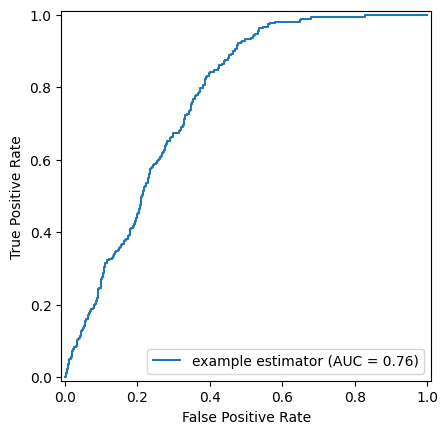

In [30]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_test)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
display.plot()
plt.show()

In [65]:
# Assuming High TPR is required, tradeoff Will be FPR will be high too
# Assuming some values to calculate the precision and recall and accuracy 

tpr_list = [0.95, 0.9, 0.85, 0.80, 0.75, 0.70, 0.65]
for tpr_val in tpr_list:
    print(f"Approx TPR : {tpr_val}")
    index = np.where(tpr > tpr_val)[0][0]
    threshold = thresholds[index]
    print(f"Threshold : {threshold}")
    y_test_pred_final = np.where(y_pred_test >= threshold, 1, 0)
    print(classification_report(y_test, y_test_pred_final))
    print("#################################################")

Approx TPR : 0.95
Threshold : 0.026374079587689565
              precision    recall  f1-score   support

           0       1.00      0.47      0.64      5341
           1       0.08      0.96      0.15       267

    accuracy                           0.49      5608
   macro avg       0.54      0.71      0.39      5608
weighted avg       0.95      0.49      0.61      5608

#################################################
Approx TPR : 0.9
Threshold : 0.03856419709654838
              precision    recall  f1-score   support

           0       0.99      0.53      0.69      5341
           1       0.09      0.90      0.16       267

    accuracy                           0.55      5608
   macro avg       0.54      0.72      0.43      5608
weighted avg       0.95      0.55      0.67      5608

#################################################
Approx TPR : 0.85
Threshold : 0.047830895513828645
              precision    recall  f1-score   support

           0       0.99      0.58      0

**Conclusion**

From the above analysis, the above model is not a very good model in predicting prospective donar. 
- If we want a high true positive rate, false positives will automatically increase and this is a trade-off